## Plots and Regression

In [1]:
# import modules
import pandas as pd

#### Cars Dataset

In [2]:
# load dataset
cars = pd.read_csv('../datasets/cars.csv')
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
cars.shape

(32, 12)

In [4]:
## process dataset
# rename column
cars = cars.rename({'Unnamed: 0': 'model'}, axis=1)

# split strings from one to multiple columns
# split model into a list
brand_df = cars['model'].str.split(" ", expand=True)
# add splitted data to dataframe
cars['brand'] = brand_df[0]
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,brand
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Datsun
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Hornet
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Hornet


In [5]:
cars['mpg'].describe()

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64

### Plots

- boxplot
- scatterplot
- regression plot
- correlation

In [6]:
# load viz libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<AxesSubplot:xlabel='brand', ylabel='mpg'>

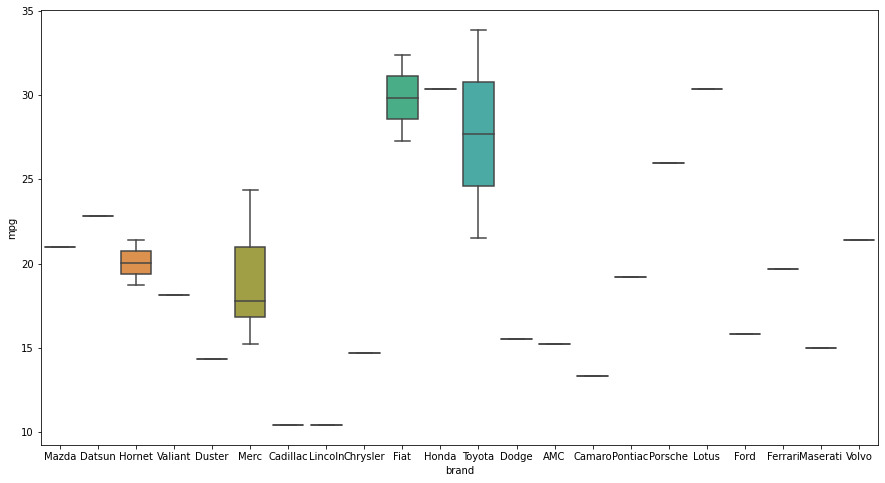

In [7]:
# boxplot
plt.figure(figsize=(15,8))
sns.boxplot(y=cars['mpg'], x=cars['brand'])

In [8]:
cars.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb', 'brand'],
      dtype='object')

<AxesSubplot:xlabel='hp', ylabel='mpg'>

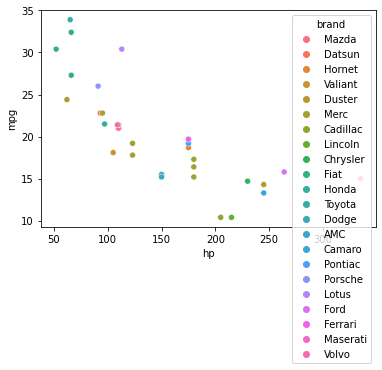

In [9]:
# scatterplot
sns.scatterplot(x='hp', y='mpg', data=cars, hue='brand')

<AxesSubplot:xlabel='cyl', ylabel='mpg'>

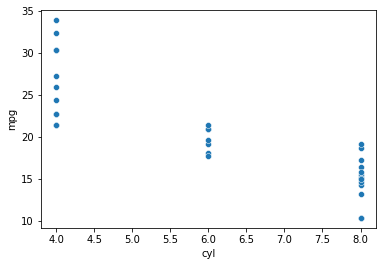

In [10]:
sns.scatterplot(x='cyl', y='mpg', data=cars)

<AxesSubplot:xlabel='cyl', ylabel='disp'>

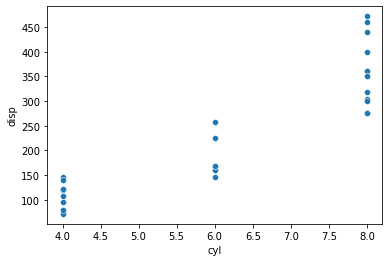

In [11]:
sns.scatterplot(x='cyl', y='disp', data=cars)

In [12]:
np.triu(np.ones_like(cars.corr()))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

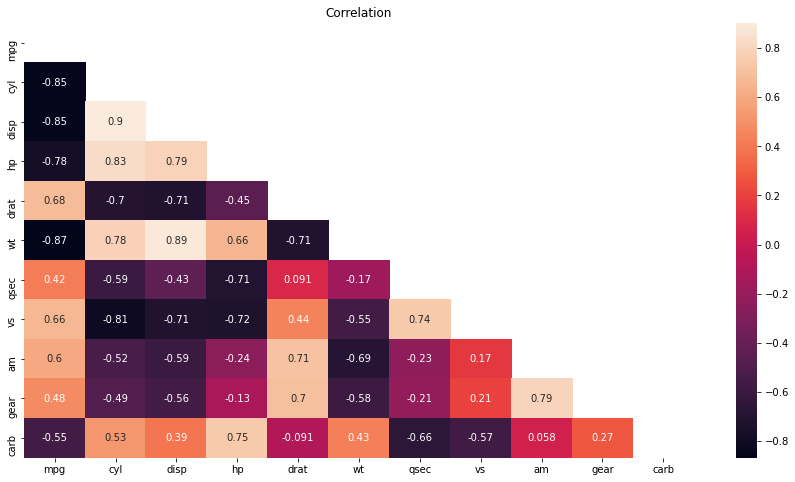

In [13]:
# get correlation
corr = cars.corr()
mask = np.triu(np.ones_like(cars.corr()))
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, mask=mask).set_title('Correlation');

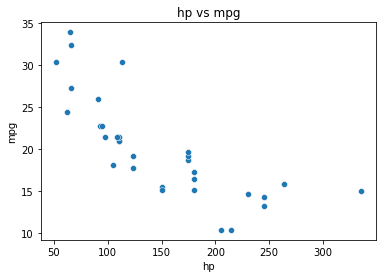

In [14]:
# hp vs mpg
sns.scatterplot(y='mpg', x='hp', data=cars).set_title('hp vs mpg');

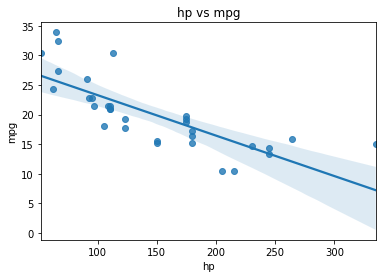

In [15]:
# reg plot
sns.regplot(y='mpg', x='hp', data=cars).set_title('hp vs mpg');

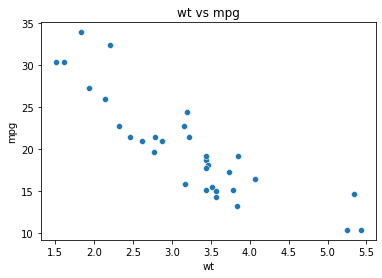

In [16]:
# wt vs mpg
sns.scatterplot(y='mpg', x='wt', data=cars).set_title('wt vs mpg');

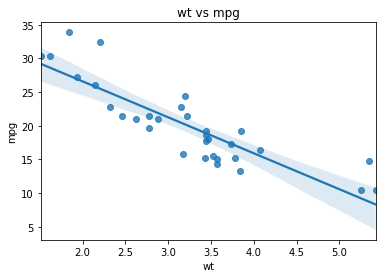

In [17]:
# wt vs mpg
sns.regplot(y='mpg', x='wt', data=cars).set_title('wt vs mpg');

### Regression Ordinary Least Square
- linear regression
- multiple regression
- prediction models

In [18]:
# load statmodels
import statsmodels.api as sm

In [19]:
y = cars['mpg']
x = cars['wt']
x = sm.add_constant(x)

# create model
mod = sm.OLS(y, x)

# fit model
results = mod.fit()

In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Sat, 04 Sep 2021   Prob (F-statistic):           1.29e-10
Time:                        17:34:57   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2851      1.878     19.858      0.000      33.450      41.120
wt            -5.3445      0.559     -9.559      0.000      -6.486      -4.203
==============================================================================
Omnibus:                        2.988   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.399
Skew:                           0.668   Prob(JB):                        0.301
Kurtosis:                       2.877   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# predict 
mpg_hat = 37.2851 - (5.3445*1)
print(mpg_hat)

31.9406


In [22]:
# update model
y = cars['mpg']
x = cars[['wt', 'hp', 'cyl']]
x = sm.add_constant(x)

# create model
mod2 = sm.OLS(y, x)

# fit model
results2 = mod2.fit()

results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     50.17
Date:                Sat, 04 Sep 2021   Prob (F-statistic):           2.18e-11
Time:                        17:34:57   Log-Likelihood:                -72.738
No. Observations:                  32   AIC:                             153.5
Df Residuals:                      28   BIC:                             159.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.7518      1.787     21.687      0.000      35.092      42.412
wt            -3.1670      0.741     -4.276      0.000      -4.684      -1.650
hp            -0.0180      0.012     -1.519      0.140      -0.042       0.006
cyl           -0.9416      0.551     -1.709      0.098      -2.070       0.187
==============================================================================
Omnibus:                        5.519   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                4.220
Skew:                           0.870   Prob(JB):                        0.121
Kurtosis:                       3.369   Cond. No.                         662.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# baseline
cars['mpg'].mean()

20.090624999999996

In [24]:
# R-Square compare between model and baseline